### Simple Linear Regression

The purpose of this brief tutproal is to use scikit-learn to:

    1. instatiate a simple liear regression model
    2. Train, test, and produce predictions of the model 
    3. Handle the data pipeline for the model 

We will study fuel consumption of automobiles in Canada. The data can be found from [here](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

We begin by importing the data and studying the features and the labels. We need to do some data cleaning as we are importing the data not in a perfecto form. The first order of this houskeeping is to rename some of the labels and assign the proper type to them. 

In [68]:
data = pd.read_csv(r"\Original_1995-1999_Fuel_Consumption_Ratings_(2-cycle).csv", encoding='cp1252').iloc[1:3500]
data.rename(columns={
                     'Unnamed: 9':'FUEL CONSUMPTION in CITY',
                     'Unnamed: 10':'FUEL CONSUMPTION in HWY',
                     'Unnamed: 11':'FUEL CONSUMPTION COMB',
                     'CO2 EMISSIONS ':'CO2 EMISSIONS'}, inplace=True)

floats = ['MODEL', 'ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'FUEL CONSUMPTION in CITY','FUEL CONSUMPTION in HWY','FUEL CONSUMPTION COMB', 'CO2 EMISSIONS']
data[floats] = data[floats].astype(float)

We have downloaded a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. We have the following fields in the dataset:

    -   MODELYEAR e.g. 2014
    -   MAKE e.g. Acura
    -   MODEL e.g. ILX
    -   VEHICLE CLASS e.g. SUV
    -   ENGINE SIZE e.g. 4.7
    -   CYLINDERS e.g 6
    -   TRANSMISSION e.g. A6
    -   FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
    -   FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
    -   FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
    -   CO2 EMISSIONS (g/km) e.g. 182   --> low --> 0



Lets the a look at the data and present descriptive statistics of the numerical variables and visualize them.

In [56]:
data.head()

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,FUEL CONSUMPTION in CITY,FUEL CONSUMPTION in HWY,FUEL CONSUMPTION COMB,CO2 EMISSIONS
1,1995.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10.2,7.0,8.8,32.0,202
2,1995.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,X,9.6,7.0,8.4,34.0,193
3,1995.0,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,Z,9.4,7.0,8.3,34.0,191
4,1995.0,ACURA,LEGEND,COMPACT,3.2,6.0,A4,Z,12.6,8.9,10.9,26.0,251
5,1995.0,ACURA,LEGEND COUPE,COMPACT,3.2,6.0,A4,Z,13.0,9.3,11.3,25.0,260


In [59]:
data[floats].describe()

,MODEL,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,FUEL CONSUMPTION in CITY,FUEL CONSUMPTION in HWY,FUEL CONSUMPTION COMB
count,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000
mean,1996.882824,3.353158,5.784796,13.203344,9.092798,11.352301,26.412689
std,1.446586,1.385782,1.645458,3.243432,2.254253,2.766073,6.727908
min,1995.000000,1.000000,2.000000,5.400000,4.300000,4.900000,13.000000
25%,1996.000000,2.200000,4.000000,10.800000,7.500000,9.400000,22.000000
50%,1997.000000,3.000000,6.000000,12.900000,8.600000,11.000000,26.000000
75%,1998.000000,4.300000,6.000000,15.100000,10.700000,13.100000,30.000000
max,1999.000000,8.000000,12.000000,26.100000,16.100000,21.300000,58.000000


array([[<AxesSubplot:title={'center':'ENGINE SIZE'}>,
        <AxesSubplot:title={'center':'CYLINDERS'}>],
       [<AxesSubplot:title={'center':'FUEL CONSUMPTION'}>,
        <AxesSubplot:title={'center':'CO2 EMISSIONS'}>]], dtype=object)

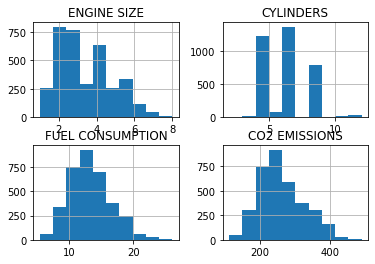

In [90]:
var = ['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'CO2 EMISSIONS']
data[var].hist()#pd.plotting.scatter_matrix(data[var], alpha=0.2)


As we are building a regression around emmissions, let's plot each of these variables with respect to it to see how linear the relationship is.

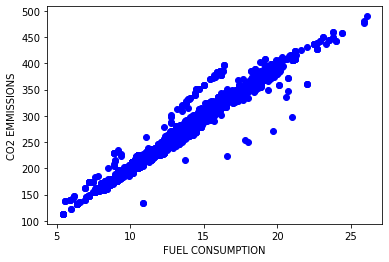

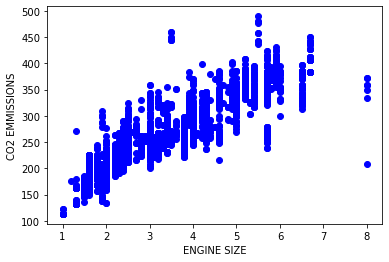

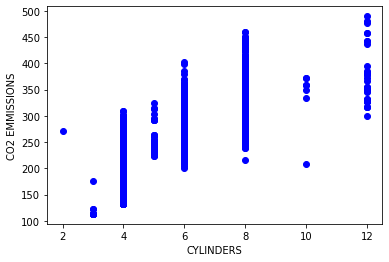

In [91]:
plt.scatter(data['FUEL CONSUMPTION'], data['CO2 EMISSIONS'],  color='blue')
plt.xlabel("FUEL CONSUMPTION")
plt.ylabel("CO2 EMMISSIONS")
plt.show()

plt.scatter(data['ENGINE SIZE'], data['CO2 EMISSIONS'],  color='blue')
plt.xlabel('ENGINE SIZE')
plt.ylabel("CO2 EMMISSIONS")
plt.show()

plt.scatter(data['CYLINDERS'], data['CO2 EMISSIONS'],  color='blue')
plt.xlabel('CYLINDERS')
plt.ylabel("CO2 EMMISSIONS")
plt.show()

As we are able to visually confirm that the above variables have a linear-ish relationship with the CO2 emmissions, we proceed to model the relationship via linear regression. Let us begin by creating the test and traning sets.

We use a numpy to construct the two sets of data by randomly sampling 80% for the traning and 20% for the testing. 

In [92]:
msk = np.random.rand(len(data)) < 0.8
train = data[var][msk]
test = data[var][~msk]

In [95]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION']])
train_y = np.asanyarray(train[['CO2 EMISSIONS']])
regr.fit(train_x, train_y)
# print coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 6.74147264 -3.58765595 18.25580854]]
Intercept:  [19.08431611]


#### Evaluation


Evaluation metrics provide a key role in the development of a model, as it sheds light to the areas that are in the need of improvement.

Let us recap the recount the most popular evaluation metrics: 

```
- Mean absolute error: The mean of the absolute value of the errors.
- Mean Squared Error (MSE): The mean of the squared error. It’s more popular than Mean absolute duew to the fact that it penalizes exponentially more the larger the error is.
- Root Mean Squared Error (RMSE).
- R-squared is a standard metric for the accuracy of your model. Roughly, it expressed the portion of the variation the model is abel to explain. The higher the R-squared, the better the model fits your data. .
```

Let's see how these statistics play out in our example.

In [102]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION']])
test_y = np.asanyarray(test['CO2 EMISSIONS'])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 68.17
Residual sum of squares (MSE): 7421.39
R2-score: 0.96


Thank you joining this brief tutorial on linear regression with scikit-learn 